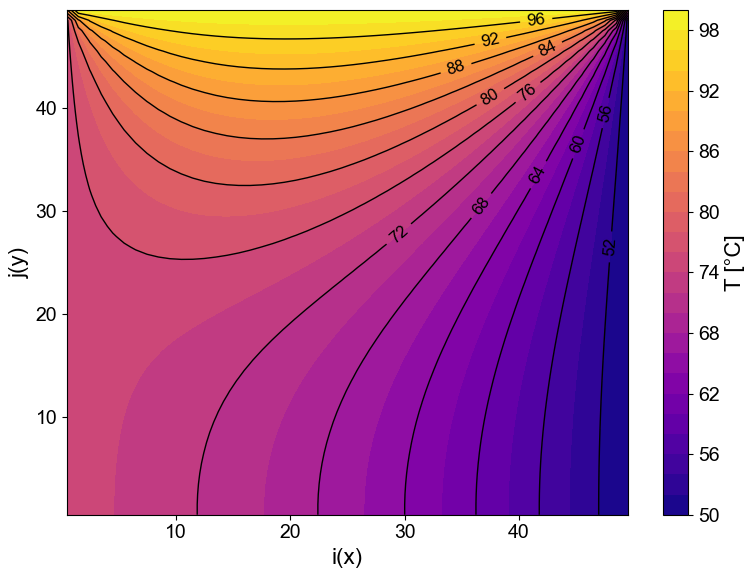

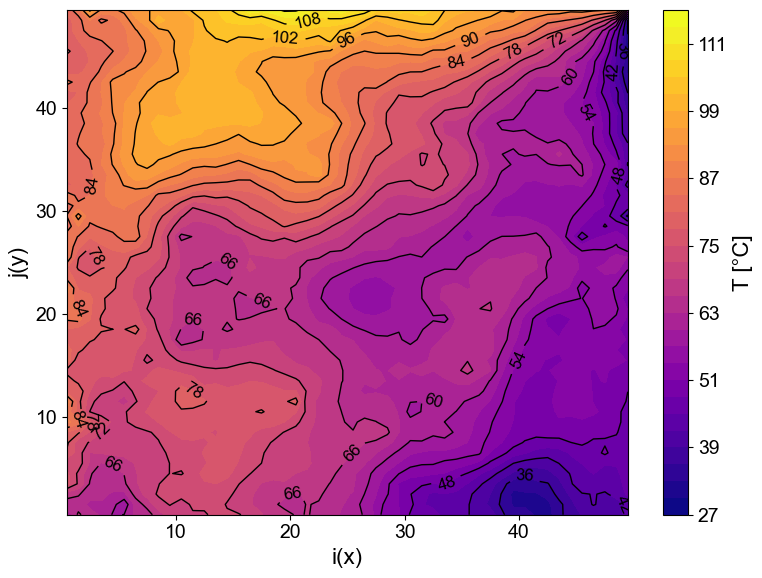


Comparación de distribuciones:
Diferencia máxima: 25.4607 °C
Diferencia media:  6.1673 °C
Desvío estándar:   4.6232 °C


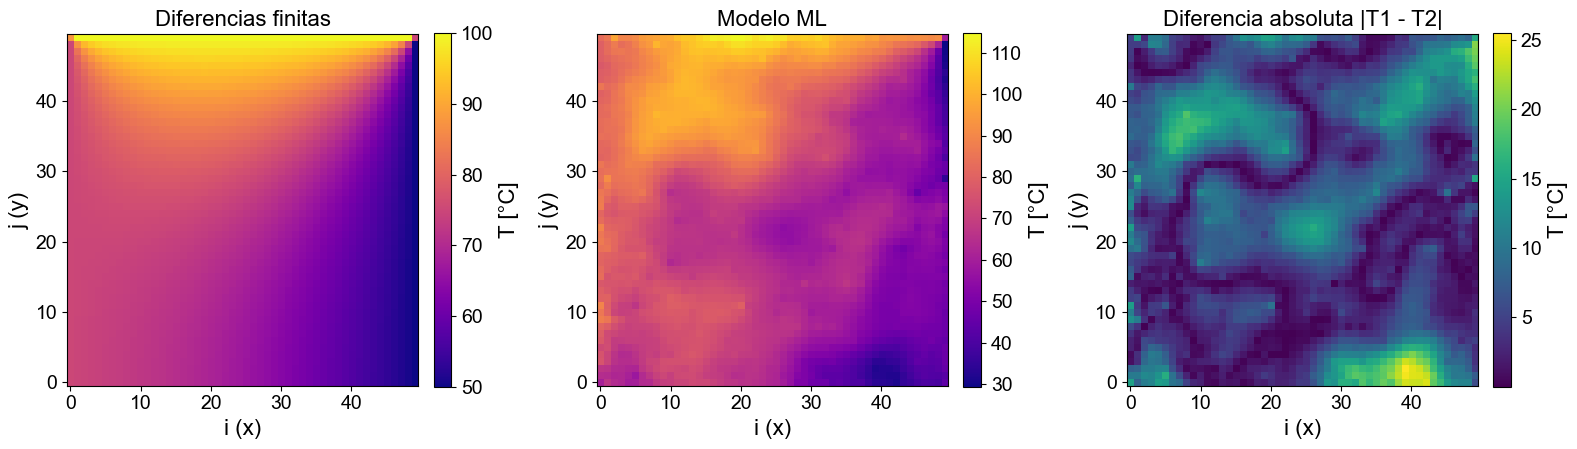

In [4]:
from pathlib import Path
import sys

BASE_DIR = Path().resolve()
sys.path.append(str(BASE_DIR.parent / 'scr'))

from solver_fd import temp_chapa_P, temp_chapa_P2, predecirTemperaturaChapa
from utils import graficarChapa, comparar_T

#   ........... VARIABLES X DE TESTEO ........................................

typ_cond_contorno = {'A':'flu','B':'temp','C':'temp','D':'temp'}

cond_contor = {'A':0,'B':50,'C':100,'D':75}

k = 200 

hot_point = {'i': 0, 'j': 15, 'T': 75}

Nx = Ny =50
dx = dy = 0.05

#   ........... MODELO ENTRENADO ..............................................

folder_results = 'MLP_100000_test_run4'

#..............................................................................

T_true = temp_chapa_P(cond_contor, Nx, Ny, typ_cond_contorno, dx, dy, k, hot_point)

T_pred = predecirTemperaturaChapa(cond_contor, typ_cond_contorno, k, folder_results,hot_point, incluir_hot_point=True)

graficarChapa(T_true, 50, 50,titulo=None)
graficarChapa(T_pred, 50, 50,titulo=None)

comparar_T(T_true, T_pred, 50, 50, folder_results,etiquetas=('Diferencias finitas', 'Modelo ML'),escala=False,titulo=False)


Se muestra la muestra con índice: 18893

=== Condiciones de Contorno ===
+---------+---------------------+-----------+
| Borde   | Tipo de condición   |     Valor |
+=========+=====================+===========+
| A       | flu                 |  5183.12  |
+---------+---------------------+-----------+
| B       | flu                 | -1283.93  |
+---------+---------------------+-----------+
| C       | temp                |   942.454 |
+---------+---------------------+-----------+
| D       | flu                 |  3269.25  |
+---------+---------------------+-----------+

=== Punto Caliente ===
+-----+-----+-------------+
|   i |   j |   Temp [°C] |
+=====+=====+=============+
|  38 |  13 |      75.953 |
+-----+-----+-------------+

Material: Copper

Comparación de distribuciones:
Diferencia máxima: 900.1307 °C
Diferencia media:  371.9777 °C
Desvío estándar:   244.5229 °C


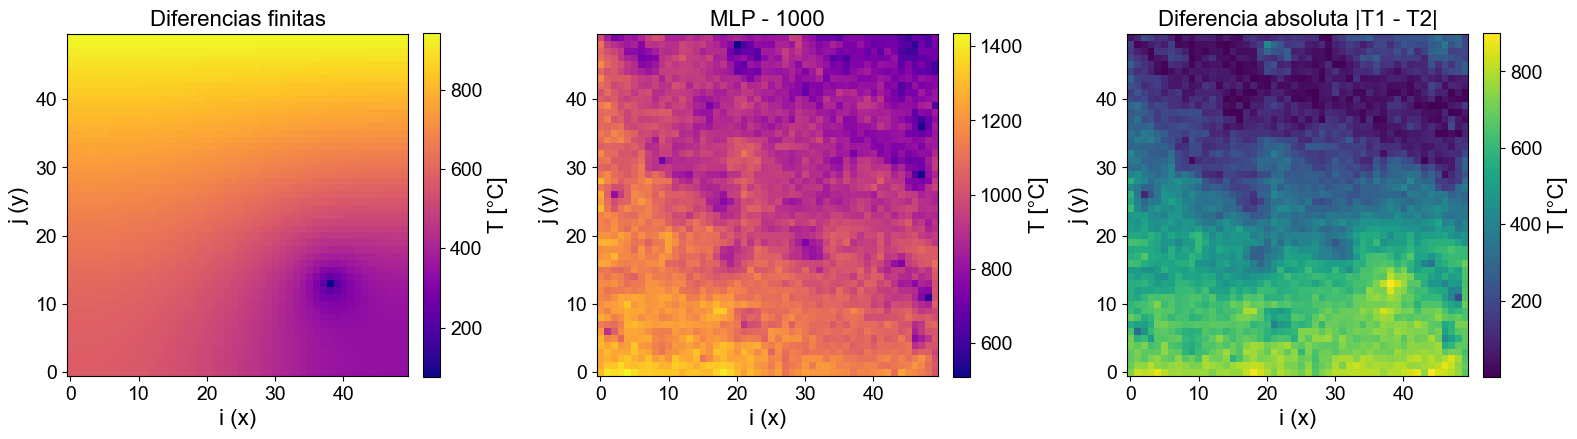

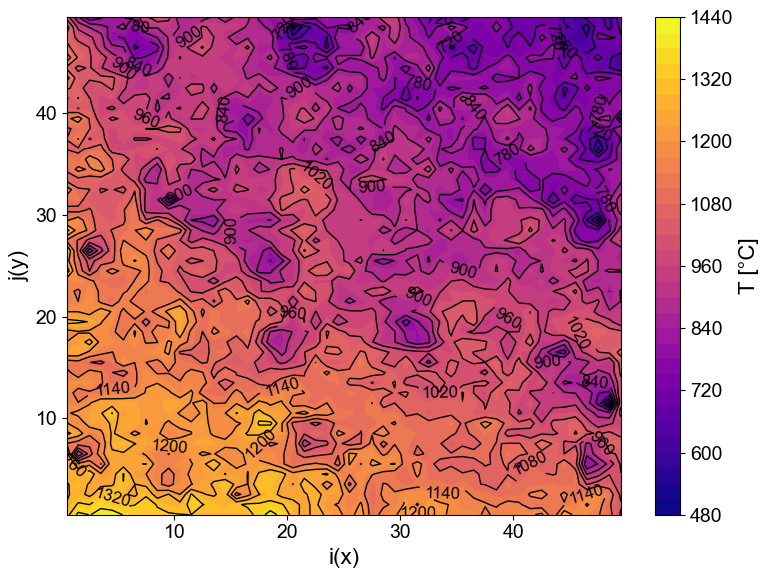


Comparación de distribuciones:
Diferencia máxima: 622.3051 °C
Diferencia media:  417.2744 °C
Desvío estándar:   96.9976 °C


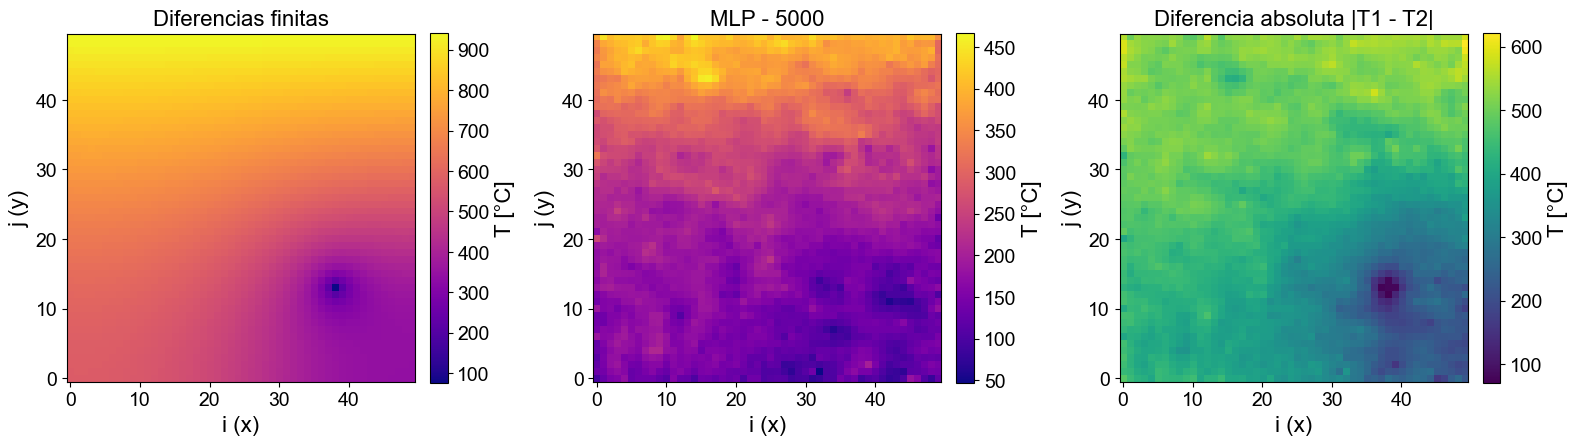

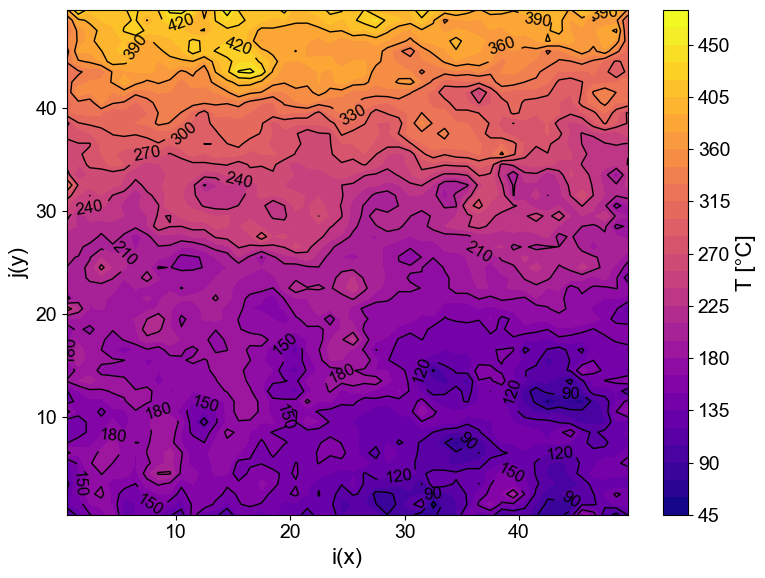


Comparación de distribuciones:
Diferencia máxima: 198.8872 °C
Diferencia media:  61.9095 °C
Desvío estándar:   33.7704 °C


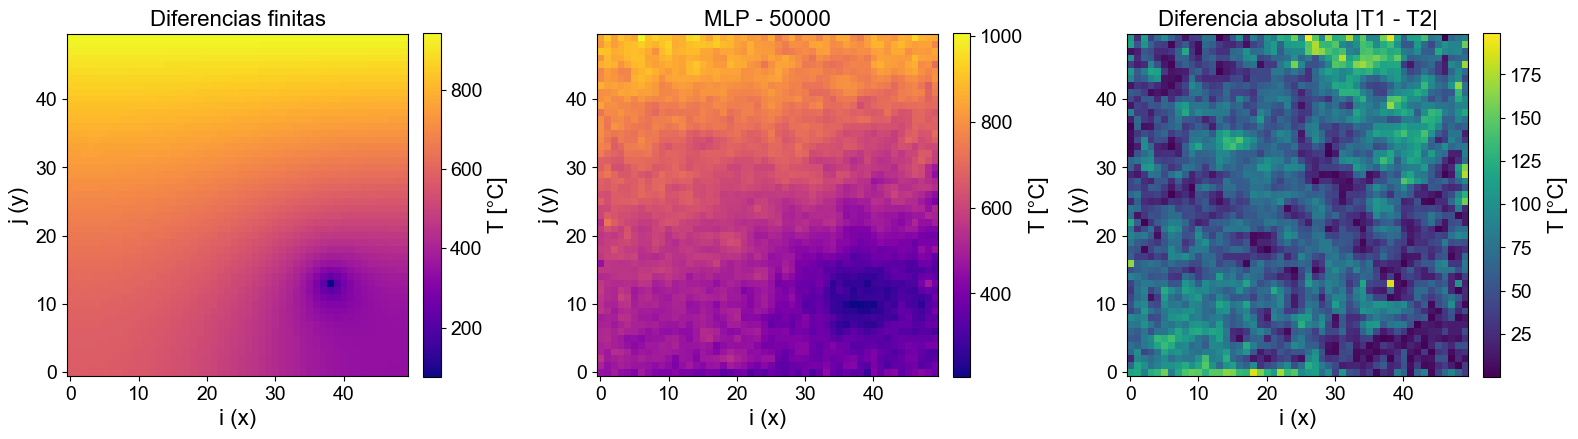

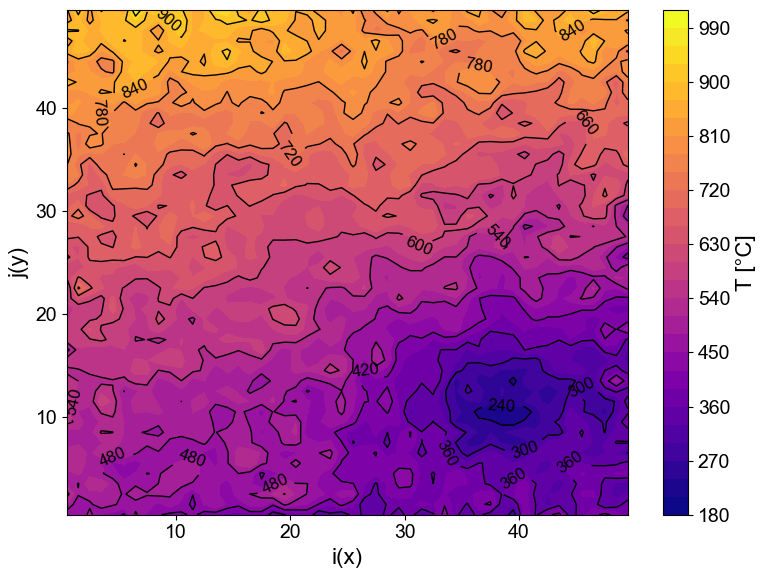


Comparación de distribuciones:
Diferencia máxima: 147.8903 °C
Diferencia media:  23.5844 °C
Desvío estándar:   19.5253 °C


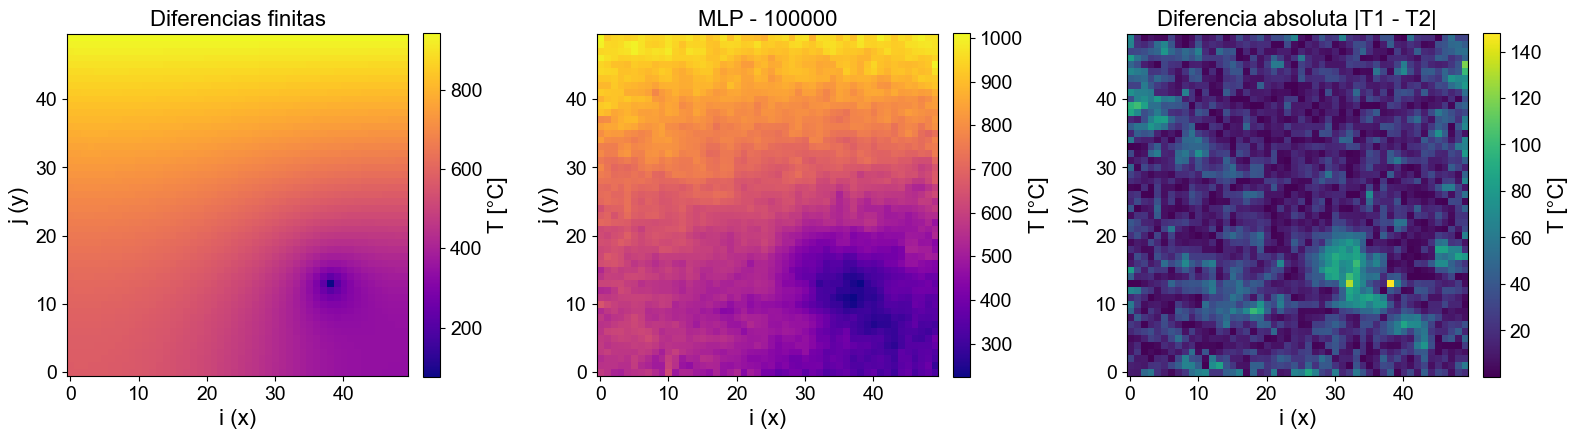

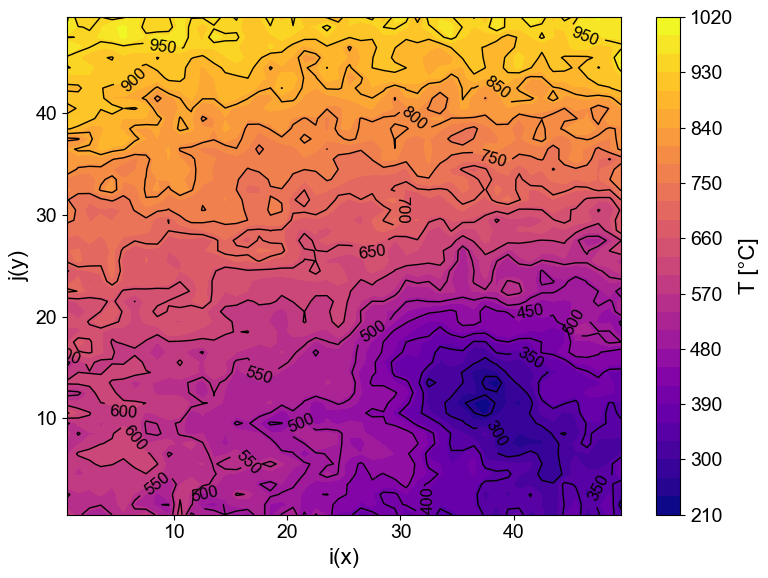


Comparación de distribuciones:
Diferencia máxima: 168.0894 °C
Diferencia media:  37.3688 °C
Desvío estándar:   26.8277 °C


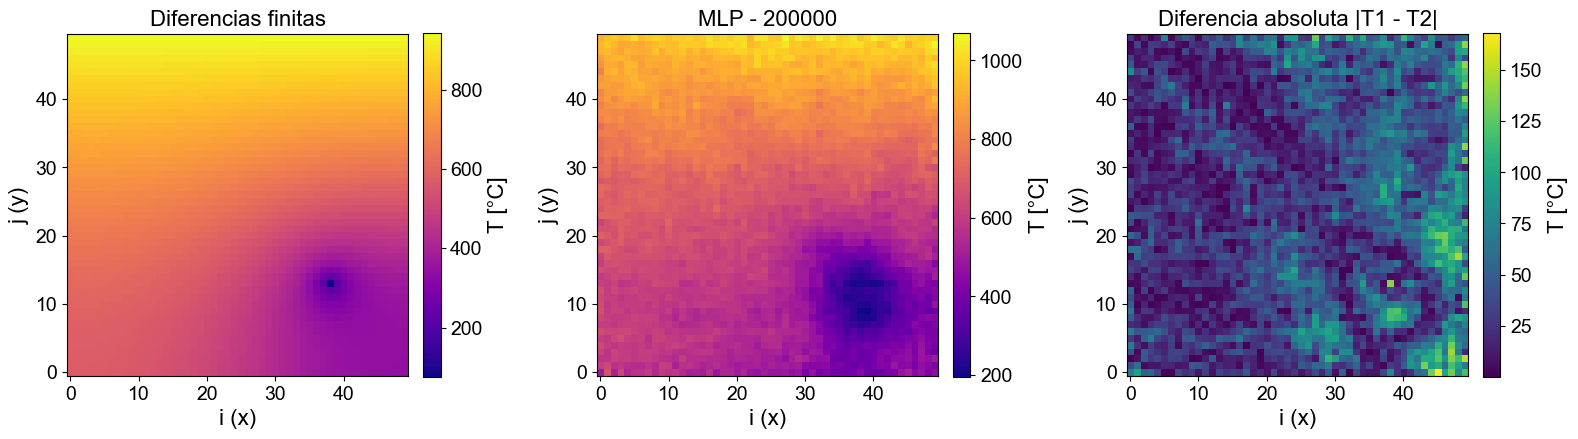

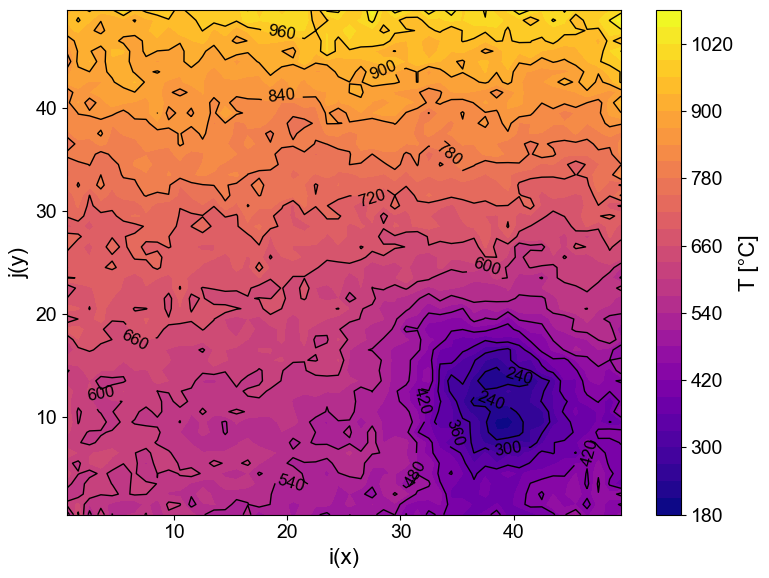

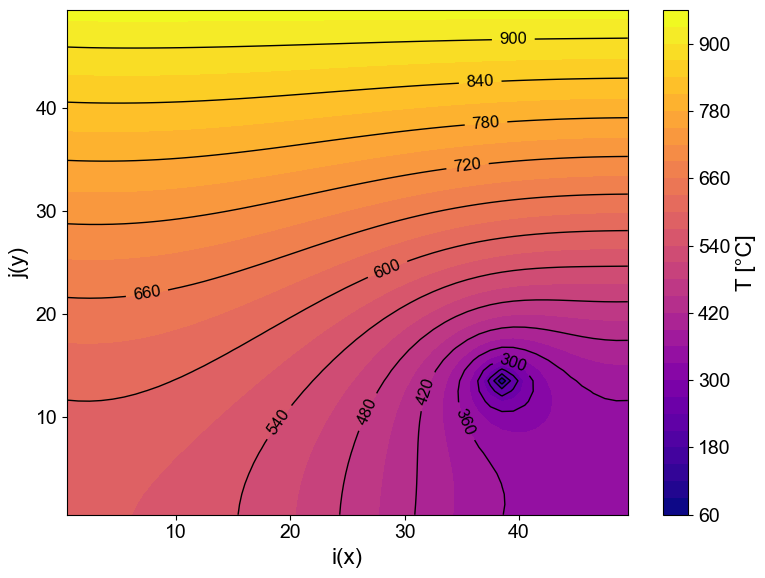

In [55]:
from pathlib import Path
import sys

BASE_DIR = Path().resolve()
sys.path.append(str(BASE_DIR.parent / 'scr'))

from utils import graficarChapa, comparar_T, compararModelos

# --- Datos y resultados ---
folder_data = 'dataset_200000_test'

# folder_resultsM = ['MLP_1000_test_run4','MLP_5000_test_run4','MLP_50000_test_run4','MLP_100000_test_run4','MLP_200000_test_run4']
# folder_results = ['MLP - 1000','MLP - 5000','MLP - 50000','MLP - 100000','MLP - 200000']

folder_resultsM = ['MLP_1000_test_run00011','MLP_5000_test_run00011','MLP_50000_test_run00011','MLP_100000_test_run00011','MLP_200000_test_run00011']
folder_results = ['MLP - 1000','MLP - 5000','MLP - 50000','MLP - 100000','MLP - 200000']

# folder_resultsM = ['MLP_100000_test_run00015','MLP_100000_test_run00016','MLP_100000_test_run00017','MLP_100000_test_run00018','MLP_100000_test_run00019','MLP_100000_test_run00019R','MLP_200000_test_run00019']
# folder_results = ['MLP - 100000 R0.3','MLP - 100000 R0.2','MLP - 100000 R0.1','MLP - 100000 R0.05','MLP - 100000R R0.025','MLP - 100000 R0.025','MLP - 200000 R0.025']

Y_true_img, y_results = compararModelos(folder_data, folder_resultsM, 'val', idx_muestra=18893, mostrarTabla=True)


for i, prediccion in enumerate(y_results):
    nombre_modelo = folder_resultsM[i]
    comparar_T(
        Y_true_img,
        prediccion,
        50, 50,
        nombre_modelo,
        etiquetas=('Diferencias finitas', f'{folder_results[i]}'),
        escala=False,
        titulo=False
    )
    graficarChapa(prediccion, 50, 50,None)

graficarChapa(Y_true_img, 50, 50,None)
